In [ ]:
!pip install gymnasium
!pip install stable-baselines3

In [ ]:
!pip install swig
!pip install gymnasium[box2d]

In [10]:
import time
import torch as th
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

In [11]:
def q_values(model: DQN, obs: np.ndarray) -> np.ndarray:
  q_net = model.q_net

  obs_tensor = th.tensor(obs, dtype=th.float32)
  obs_tensor = obs_tensor.unsqueeze(0)
  q_values = model.q_net.forward(obs_tensor)

  return q_values.detach().numpy()[0]

In [12]:
def plot_q_values(q_values_list):
  q1_values, q2_values, q3_values, q4_values = zip(*q_values_list)

  plt.figure(figsize=(10, 6))
  plt.plot(q1_values, label='Q1 Values')
  plt.plot(q2_values, label='Q2 Values')
  plt.plot(q3_values, label='Q3 Values')
  plt.plot(q4_values, label='Q4 Values')
  plt.xlabel('Time')
  plt.ylabel('Q-Values')
  plt.title('Convergence of Q-Values over Time')
  plt.legend()
  plt.show()

In [13]:
def mean_reward(discount_factor):
  env = gym.make("LunarLander-v2", continuous = False, enable_wind = False)

  model = DQN("MlpPolicy", env, verbose=1, gamma=discount_factor)

  n_eval_episodes = 250

  mean_reward, std_reward = evaluate_policy(model, gym.make("LunarLander-v2", continuous = False, enable_wind = False), deterministic=True, n_eval_episodes=n_eval_episodes)
  print(f"До обучения модели с discount_factor = {discount_factor}, mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

  start_time = time.time()

  model.learn(total_timesteps=100000, log_interval=10000)

  end_time = time.time()

  mean_reward, std_reward = evaluate_policy(model, gym.make("LunarLander-v2",
    continuous = False,
    enable_wind = False), deterministic=True, n_eval_episodes=n_eval_episodes)
  print(f"После обучения модели с discount_factor = {discount_factor}, mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")
  model.save(f"dqn_cartpole_{discount_factor}")
  del model

  learn_time = end_time - start_time
  return env, learn_time

In [14]:
def q_values_calculation(discount_factor, env):
  model = DQN.load(f"dqn_cartpole_{discount_factor}")

  action_str = ['left','right']
  q_values_list = []

  obs, info = env.reset()
  for _ in range(100):
      q_val = q_values(model,obs)
      q_values_list.append(q_val)
      action, _states = model.predict(obs, deterministic=True)
      obs, reward, terminated, truncated, info = env.step(action)

  return q_values_list

In [15]:
discount_factors = [0.01,0.5,0.99]

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


До обучения модели с discount_factor = 0.01, mean_reward:-605.29 +/- 163.17
После обучения модели с discount_factor = 0.01, mean_reward:-123.18 +/- 137.45


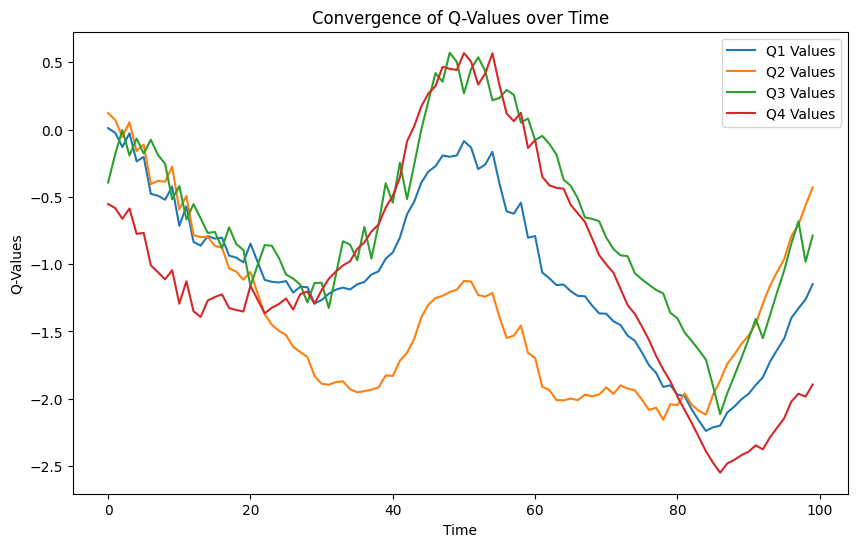

Время обучения модели при discount_factor = 0.01 : 75.85465717315674 секунд.


In [16]:
environment, time_to_lrn = mean_reward(discount_factors[0])
q_vals = q_values_calculation(discount_factors[0], environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factors[0]} : {time_to_lrn} секунд.')

In [17]:
environment.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
До обучения модели с discount_factor = 0.5, mean_reward:-127.15 +/- 44.63
После обучения модели с discount_factor = 0.5, mean_reward:-68.64 +/- 125.21


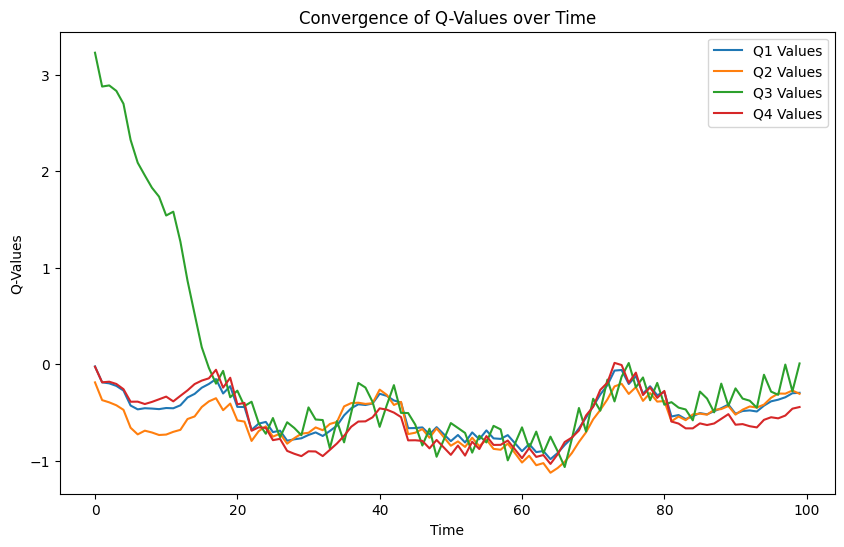

Время обучения модели при discount_factor = 0.5 : 86.98923349380493 секунд.


In [18]:
environment, time_to_lrn = mean_reward(discount_factors[1])
q_vals = q_values_calculation(discount_factors[1], environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factors[1]} : {time_to_lrn} секунд.')

In [19]:
environment.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
До обучения модели с discount_factor = 0.99, mean_reward:-558.10 +/- 129.87
После обучения модели с discount_factor = 0.99, mean_reward:-115.52 +/- 35.96


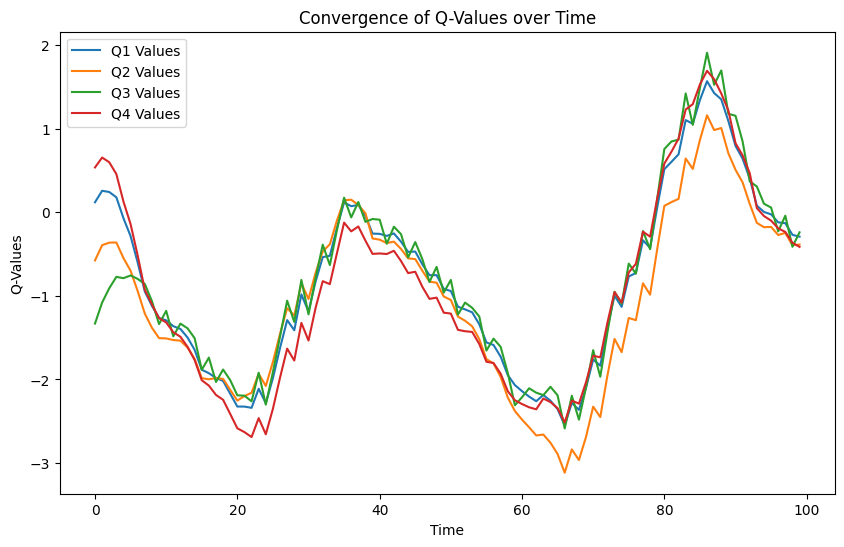

Время обучения модели при discount_factor = 0.99 : 76.7754545211792 секунд.


In [20]:
environment, time_to_lrn = mean_reward(discount_factors[2])
q_vals = q_values_calculation(discount_factors[2], environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factors[2]} : {time_to_lrn} секунд.')

In [21]:
environment.close()